In [13]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix,  accuracy_score, precision_score, recall_score, f1_score

import warnings
warnings.filterwarnings("ignore")

In [2]:
dados = pd.read_json("Telco-Customer-Churn-balanceamento.json")
dados.head()

,Genero,Idoso,Parceiro,Dependentes,Meses_na_Empresa,Servico_Telefonico,Multiplas_Linhas,Servico_Seguranca_Online,Backup_Online,Protecao_Dispositivo,...,Metodo_Pagamento_Credit card (automatic),Metodo_Pagamento_Electronic check,Metodo_Pagamento_Mailed check,Contrato_Month-to-month,Contrato_One year,Contrato_Two year,Servico_Internet_DSL,Servico_Internet_Fiber optic,Servico_Internet_No,Churn
0,1,0,1,1,9,1,0,0,1,0,...,0,0,1,0,1,0,1,0,0,0
1,0,0,0,0,9,1,1,0,0,0,...,0,0,1,1,0,0,1,0,0,0
2,0,0,0,0,4,1,0,0,0,1,...,0,1,0,1,0,0,0,1,0,1
3,0,1,1,0,13,1,0,0,1,1,...,0,1,0,1,0,0,0,1,0,1
4,1,1,1,0,3,1,0,0,0,0,...,0,0,1,1,0,0,0,1,0,1


In [3]:
X = dados.drop(['Churn'], axis=1)
y = dados['Churn']

In [4]:
SEED = 42

In [5]:
x_train, x_test, y_train, y_test = train_test_split(X, y, random_state=SEED)

##### Definindo conjunto de parâmetros para modelo Random Forest 

n_estimators: Número de árvores na floresta. Aqui, é um intervalo de valores de 100 a 180 com incremento de 20 (ou seja, [100, 120, 140, 160, 180]).

criterion: Função usada para medir a qualidade de uma divisão. Pode ser "gini" (Índice de Gini) ou "entropy" (Entropia), que são critérios comuns para classificação.

max_features: Número de características a serem consideradas para a melhor divisão. Pode ser "auto" (usa a raiz quadrada do número total de características) ou "log2" (usa o logaritmo base 2 do número total de características).

max_depth: Profundidade máxima das árvores. Aqui, varia de 2 a 8 com incremento de 2 (ou seja, [2, 4, 6, 8]).

min_samples_split: Número mínimo de amostras necessárias para dividir um nó interno. Variedade de valores de 2 a 8 com incremento de 2 (ou seja, [2, 4, 6, 8]).

min_samples_leaf: Número mínimo de amostras necessárias em um nó folha. Pode ser 2 ou 4.

bootstrap: Indica se o bootstrap (amostragem com reposição) deve ser usado ao construir árvores. Pode ser True (usar bootstrap) ou False (não usar bootstrap).

In [6]:
n_estimators = np.arange(100, 200, step=20)	
criterion = ["gini", "entropy"]  
max_features = ["auto", "log2"]
max_depth = list(np.arange(2, 10, step=2))
min_samples_split = np.arange(2, 10, step=2)
min_samples_leaf = [2, 4]
bootstrap = [True, False]

parameters = {
    "n_estimators": n_estimators,
    "criterion": criterion,
    "max_features": max_features,
    "max_depth": max_depth,
    "min_samples_split": min_samples_split,
    "min_samples_leaf": min_samples_leaf,
    "bootstrap": bootstrap,
}

In [7]:
clf = GridSearchCV(RandomForestClassifier(random_state=SEED), parameters, cv=3, n_jobs=-1, scoring="recall")
clf.fit(x_train, y_train)  # ajuste com os dados de treino

GridSearchCV(cv=3, estimator=RandomForestClassifier(random_state=42), n_jobs=-1,
             param_grid={'bootstrap': [True, False],
                         'criterion': ['gini', 'entropy'],
                         'max_depth': [np.int64(2), np.int64(4), np.int64(6),
                                       np.int64(8)],
                         'max_features': ['auto', 'log2'],
                         'min_samples_leaf': [2, 4],
                         'min_samples_split': array([2, 4, 6, 8]),
                         'n_estimators': array([100, 120, 140, 160, 180])},
             scoring='recall')

In [8]:
pd.DataFrame(clf.cv_results_).sort_values(by="rank_test_score").head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_bootstrap,param_criterion,param_max_depth,param_max_features,param_min_samples_leaf,param_min_samples_split,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score
1249,0.904190,0.020750,0.049836,0.010006,False,entropy,8,log2,2,4,180,"{'bootstrap': False, 'criterion': 'entropy', '...",0.895385,0.886241,0.882398,0.888008,0.005447,1
1244,0.908648,0.015696,0.043292,0.002067,False,entropy,8,log2,2,2,180,"{'bootstrap': False, 'criterion': 'entropy', '...",0.895385,0.886241,0.882398,0.888008,0.005447,1
1243,0.814037,0.011450,0.040108,0.007054,False,entropy,8,log2,2,2,160,"{'bootstrap': False, 'criterion': 'entropy', '...",0.893846,0.885473,0.881630,0.886983,0.005100,3
1248,0.800467,0.037455,0.046318,0.010531,False,entropy,8,log2,2,4,160,"{'bootstrap': False, 'criterion': 'entropy', '...",0.893846,0.885473,0.881630,0.886983,0.005100,3
934,0.865715,0.028626,0.045074,0.003924,False,gini,8,log2,2,6,180,"{'bootstrap': False, 'criterion': 'gini', 'max...",0.896154,0.882398,0.880092,0.886215,0.007091,5


In [9]:
clf.best_params_

{'bootstrap': False,
 'criterion': 'entropy',
 'max_depth': np.int64(8),
 'max_features': 'log2',
 'min_samples_leaf': 2,
 'min_samples_split': np.int64(2),
 'n_estimators': np.int64(180)}

In [10]:
rforest = RandomForestClassifier(**clf.best_params_, random_state=SEED)

In [11]:
model = rforest.fit(x_train, y_train)  # treinamento com os dados de treino
y_pred = rforest.predict(x_test)  # realizando as predições

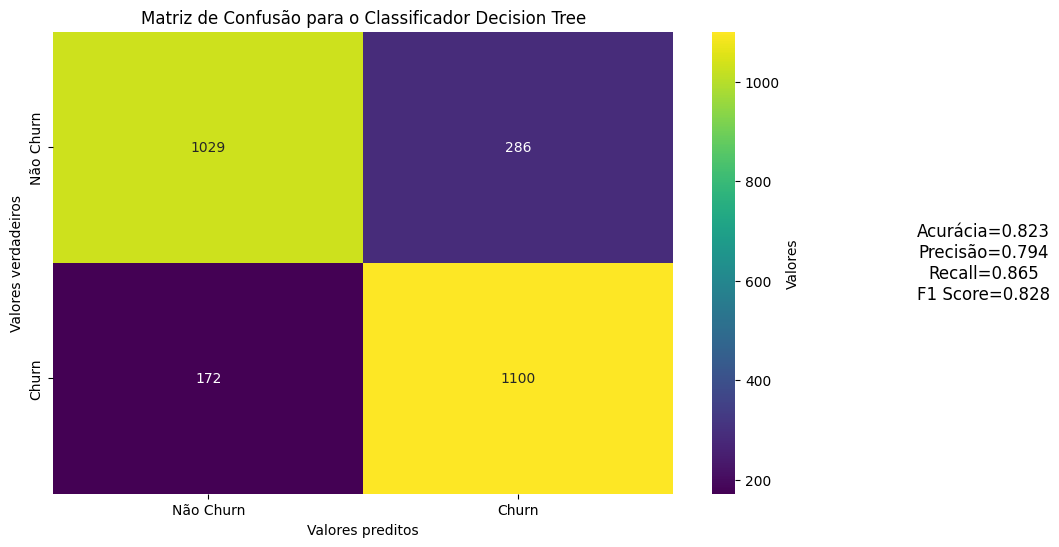

In [14]:
cm = confusion_matrix(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

variaveis = ['Churn', 'Não Churn']
labels = ['Verdadeiro Positivo', 'Falso Negativo', 'Falso Positivo', 'Verdadeiro Negativo']

#Plotando a matriz de confusão

plt.figure(figsize=(10, 6))
ax = sns.heatmap(cm, annot=True, fmt='d', cmap='viridis', cbar_kws={'label': 'Valores'})

# Configurando os rótulos dos eixos
ax.set_xticklabels(['Não Churn', 'Churn'])
ax.set_yticklabels(['Não Churn', 'Churn'])
plt.xlabel('Valores preditos')
plt.ylabel('Valores verdadeiros')

plt.title('Matriz de Confusão para o Classificador Decision Tree')

plt.text(1.5, 0.5, f'Acurácia={accuracy:.3f}\nPrecisão={precision:.3f}\nRecall={recall:.3f}\nF1 Score={f1:.3f}',
         horizontalalignment='center', verticalalignment='center', transform=ax.transAxes, fontsize=12)

plt.show()

In [15]:
print(f"Acurácia de treinamento: {rforest.score(x_train, y_train) * 100:.2f}%")  # Verificando a acurácia de treinamento

Acurácia de treinamento: 84.78%
